# 📈 XGBoost Regression

### 📓 Definition

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm. Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems. Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

### 🔗 Visit **<a href="https://machinelearningmastery.com/xgboost-for-regression/">here</a>** to know more.

### 🔗 Visit **<a href="https://xgboost.readthedocs.io/en/stable/parameter.html">here</a>** for the algorithm documentation.

## 🧹 Data Pre-Processing Phase

### 📓 Definition

Data preprocessing refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis.

### 🔹 What we will do in this section?

- Importing the basic libraries.
- Importing the dataset directly from **<a href="https://github.com/rikisupriyo/end-to-end-ml/tree/main/DATASETS">here</a>**.
- Checking if the dataset got any missing values or not.
- Replacing the missing values (if any).
- Seperating the dependent and independent variables from the dataset.
- Splitting the dataset into training and testing set.
- Feature Scaling the dataset

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the dataset

dataset = pd.read_csv('https://raw.githubusercontent.com/rikisupriyo/end-to-end-ml/main/DATASETS/REGRESSION/Data.csv')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
# Checking the datatype of each columns 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
# Checking if there are any missing values in the dataset we need to replace

dataset.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
# Seperating the dependent and independent variables into X and y respectively

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Checking the shape of X and y

print(f'Shape of X: {X.shape}\nShape of y: {y.shape}')

Shape of X: (9568, 4)
Shape of y: (9568,)


In [7]:
# Splitting the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f'Shape of X_train: {X_train.shape}\nShape of y_train: {y_train.shape}\nShape of X_test: {X_test.shape}\nShape of y_test: {y_test.shape}')

Shape of X_train: (7654, 4)
Shape of y_train: (7654,)
Shape of X_test: (1914, 4)
Shape of y_test: (1914,)


### 🔑 Important Note:

We should always feature scale our data only after splitting our data into training and testing set because if we apply it before the split then it will actually get the mean and the standard deviation of all the values, including the ones in the test set. Since the test set is something we are supposed to have like some future data in production, applying feature scaling on the original data set, before the split would cause some information leakage on the test set. That's why it's a very good practice.

In [8]:
# Standardscaling the data to avoid large gaps between each numbers

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Printing the first 5 rows of the Standardized dataset

print(X_test[:5])

[[ 1.20924389  1.84743445 -0.61878043 -0.28968211]
 [-0.29401214 -0.39528045  1.39211729  0.76937061]
 [-0.64629575 -0.88607065  1.00508258  1.77019599]
 [ 0.37559565  0.30674585 -0.00457318 -0.31639819]
 [-0.17299868  0.06724023  1.1750413  -0.34037416]]


## 🤖 XGBoost Regression

### 🔹 What we will do in this section?

- Importing and training the XGBoost Model.
- Predicting on both training and testing set with our trained model.

In [9]:
# Training the XGBoost Regression Model

from xgboost import XGBRegressor

model = XGBRegressor() 
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
# Predicting on the training set

y_pred_train = model.predict(X_train)
print(f'Train Set Predictions: {y_pred_train[:3]}')

# Predicting on the testing set

y_pred_test = model.predict(X_test)
print(f'Test Set Predictions: {y_pred_test[:3]}')

Train Set Predictions: [476.36554 467.72018 431.4049 ]
Test Set Predictions: [435.30075 457.39505 463.0207 ]


## 📊 Visualization and Evaluation of our Model

### 🔹 What we will do in this section?

- Plotting y_train against y_pred_train.
- Plotting y_test against y_pred_test.
- Evaluating our model's R-Squared Score.

[]

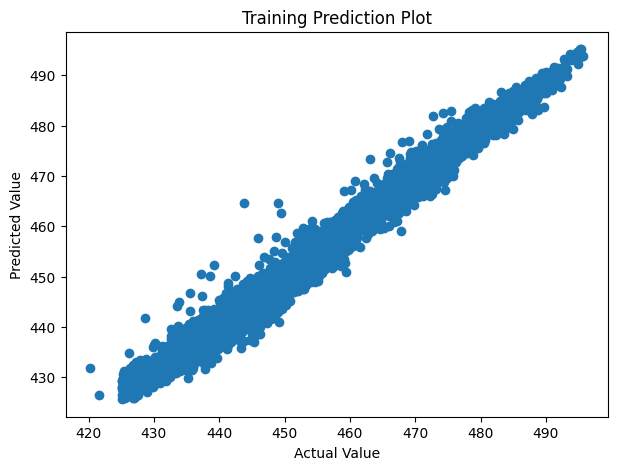

In [11]:
# Plotting the Training Set

plt.figure(figsize = (7, 5))
plt.scatter(y_train, y_pred_train)
plt.title('Training Prediction Plot')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.plot()

[]

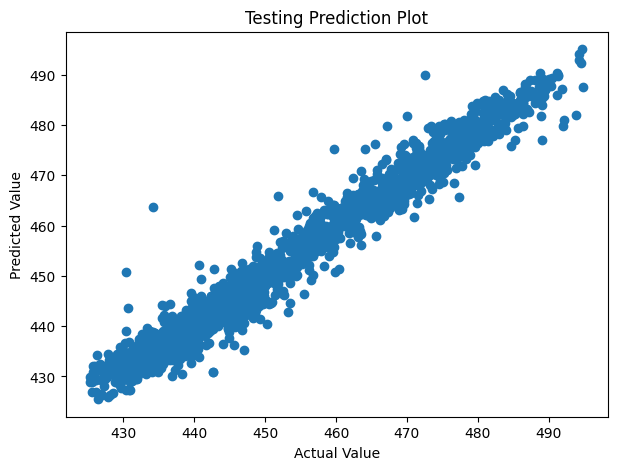

In [12]:
# Plotting the Testing Set

plt.figure(figsize = (7, 5))
plt.scatter(y_test, y_pred_test)
plt.title('Testing Prediction Plot')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.plot()

In [13]:
# Checking the R-Squared score of our model

from sklearn.metrics import r2_score

# R-Squared score for our training set

print(f'R-Squared Score of Training Set: {r2_score(y_train, y_pred_train) * 100:.2f} %')

# R-Squared score for our testing set

print(f'R-Squared Score of Testing Set: {r2_score(y_test, y_pred_test) * 100:.2f} %')

R-Squared Score of Training Set: 98.65 %
R-Squared Score of Testing Set: 96.72 %


### 📝 Conclusion:

Wow, this time our model performed really good on both our training and testing set. Maybe we can tweak our model's hyperparameter further to get even more amazing results.

# ✅ DONE!